<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/EVDA_project22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Menautkan Google Drive dengan Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Path dari masing_masing data di google drive
meta_path = "/content/drive/MyDrive/EVDA_project22/building_metadata.csv"
pwTrain_path = "/content/drive/MyDrive/EVDA_project22/train.csv"
wtTrain_path = "/content/drive/MyDrive/EVDA_project22/weather_train.csv"
pwTest_path = "/content/drive/MyDrive/EVDA_project22/test.csv"
wtTest_path = "/content/drive/MyDrive/EVDA_project22/weather_test.csv"

In [6]:
df_meta = pd.read_csv(meta_path)

In [7]:
#Melihat 10 Data Pertama di Metadata Bangunan
df_meta.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [8]:
# melihat informasi dari Metadata Bangunan
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [9]:
df_meta.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [10]:
nbaris,nkolom = df_meta.shape
#Cek Null Value pada year_built
null_YB = (df_meta['year_built'].isnull().sum())/nbaris*100
print('% Null Value pada year_built')
print (round(null_YB,4))
#Cek Null Value pada floor_count
null_FC = (df_meta['floor_count']).isnull().sum()/nbaris*100
print('% Null Value pada floor_count')
print (round(null_FC,4))

% Null Value pada year_built
53.4161
% Null Value pada floor_count
75.5003


In [11]:
skewness_cek = ['year_built','floor_count']
df_meta[skewness_cek].skew(axis=0, skipna=True)

year_built    -0.376338
floor_count    2.231123
dtype: float64

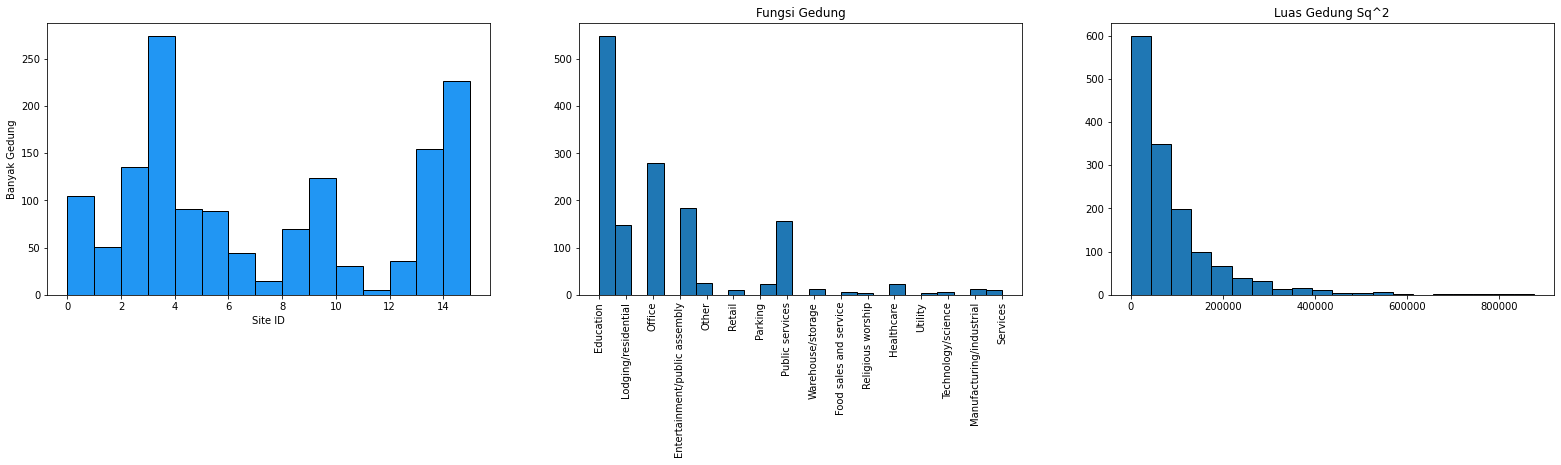

In [12]:
#cek plot satu-persatu
plt.figure(figsize=[27,5])
plt.subplot(1,3,1)
plt.hist(df_meta['site_id'], bins=15, ec='black',color="#2196f3")
plt.xlabel('Site ID')
plt.ylabel('Banyak Gedung')
plt.subplot(1,3,2)
plt.title("Fungsi Gedung")
plt.hist(df_meta['primary_use'],bins=25,ec="black")
plt.xticks(rotation=90)
plt.subplot(1,3,3)
plt.title("Luas Gedung Sq^2")
plt.hist(df_meta['square_feet'],bins=20,edgecolor='white',ec="black")
plt.show()

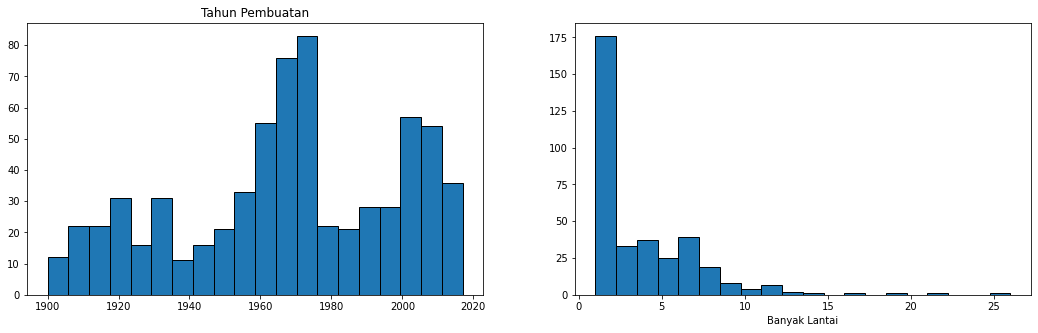

In [13]:
#cek plot satu-persatu
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Tahun Pembuatan")
plt.hist(df_meta['year_built'],bins=20,ec="black")
plt.subplot(1,2,2)
plt.xlabel('Banyak Lantai')
plt.hist(df_meta['floor_count'],bins=20,edgecolor='white',ec="black")
plt.show()

In [14]:
corr = df_meta.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,site_id,building_id,square_feet,year_built,floor_count
site_id,1.00,0.98,0.08,-0.19,-0.47
building_id,0.98,1.00,0.07,-0.23,-0.48
square_feet,0.08,0.07,1.00,0.11,0.53
year_built,-0.19,-0.23,0.11,1.00,0.10
floor_count,-0.47,-0.48,0.53,0.10,1.00


In [15]:
df_pwTrain = pd.read_csv(pwTrain_path)

In [16]:
df_pwTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [17]:
df_wtTrain = pd.read_csv(wtTrain_path)

In [18]:
df_wtTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [25]:
#menggabungkan data di Metadata Bangunan dengan Data Power(Training)
df_trainAll = df_pwTrain.merge(df_meta, on='building_id',how='left')
df_trainAll = df_trainAll.merge(df_wtTrain, on=['site_id','timestamp'],how='left')

In [26]:
df_trainAll.head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,5,0,2016-01-01 00:00:00,0.0,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,6,0,2016-01-01 00:00:00,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,7,0,2016-01-01 00:00:00,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,8,0,2016-01-01 00:00:00,0.0,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,9,0,2016-01-01 00:00:00,0.0,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [27]:
df_trainAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.6+ GB


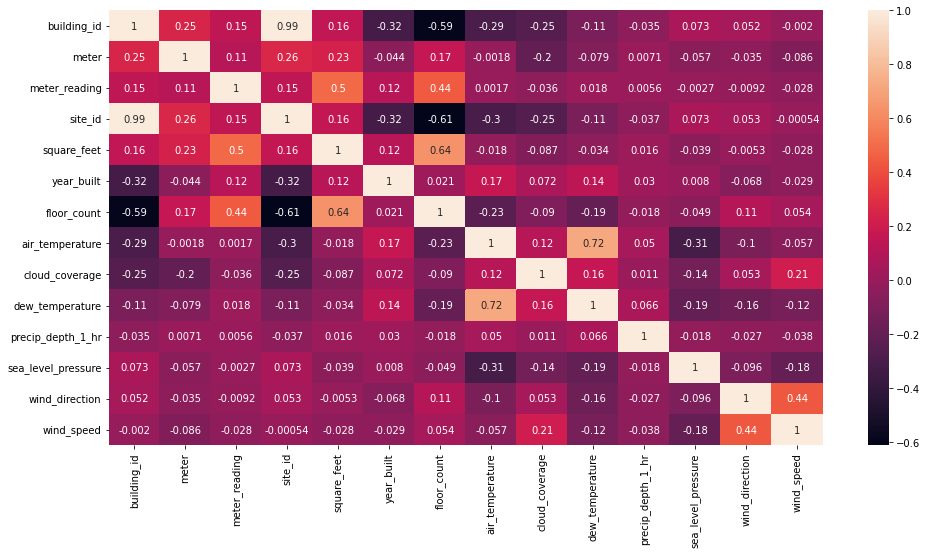

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
corr = df_trainAll[[col for col in df_trainAll.columns if col != 'year']].sample(10000).corr(method='spearman')
_ = sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)